# What's Cooking (Kaggle Problem)

## Table of Content

* __Step 1: Problem Description__

* __Step 2: Importing the Relevant Libraries__
    
* __Step 3: Loading Data__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Preprocessing__
    
* __Step 6: Merging Train and Test Data for TF vectorization__

* __Step 7: Splitting data into train and validation__

* __Step 8: Preperation For Model Building__

* __Step 9: Building Classification Models__
    

## Problem Description

#### Use recipe ingredients to categorize the cuisine

If you're in Northern California, you'll be walking past the inevitable bushels of leafy greens, spiked with dark purple kale and the bright pinks and yellows of chard. Across the world in South Korea, mounds of bright red kimchi greet you, while the smell of the sea draws your attention to squids squirming nearby. India’s market is perhaps the most colorful, awash in the rich hues and aromas of dozens of spices: turmeric, star anise, poppy seeds, and garam masala as far as the eye can see.

Some of our strongest geographic and cultural associations are tied to a region's local foods. This playground competitions asks you to predict the category of a dish's cuisine given a list of its ingredients. 

## Importing the relevant libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import datetime

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Loading Data

In [3]:
train_data=pd.read_json("/content/drive/MyDrive/Whats_Cooking/train.json")

In [4]:
test_data=pd.read_json('/content/drive/MyDrive/Whats_Cooking/test.json')

## Exploratory Data Analysis

In [5]:
train_data.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [6]:
type(train_data)

pandas.core.frame.DataFrame

In [7]:
train_data.shape

(39774, 3)

In [8]:
test_data.shape

(9944, 2)

In [9]:
test_data.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


### Anlysing Target Column

In [10]:
print("The count distribution target classes is as below:")

train_data['cuisine'].value_counts()

The count distribution target classes is as below:


italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [11]:
print("The percentage distribution target classes is as below:")

train_data['cuisine'].value_counts('1')

The percentage distribution target classes is as below:


italian         0.197063
mexican         0.161865
southern_us     0.108614
indian          0.075502
chinese         0.067205
french          0.066526
cajun_creole    0.038870
thai            0.038694
japanese        0.035777
greek           0.029542
spanish         0.024865
korean          0.020868
vietnamese      0.020742
moroccan        0.020642
british         0.020214
filipino        0.018982
irish           0.016770
jamaican        0.013225
russian         0.012294
brazilian       0.011741
Name: cuisine, dtype: float64

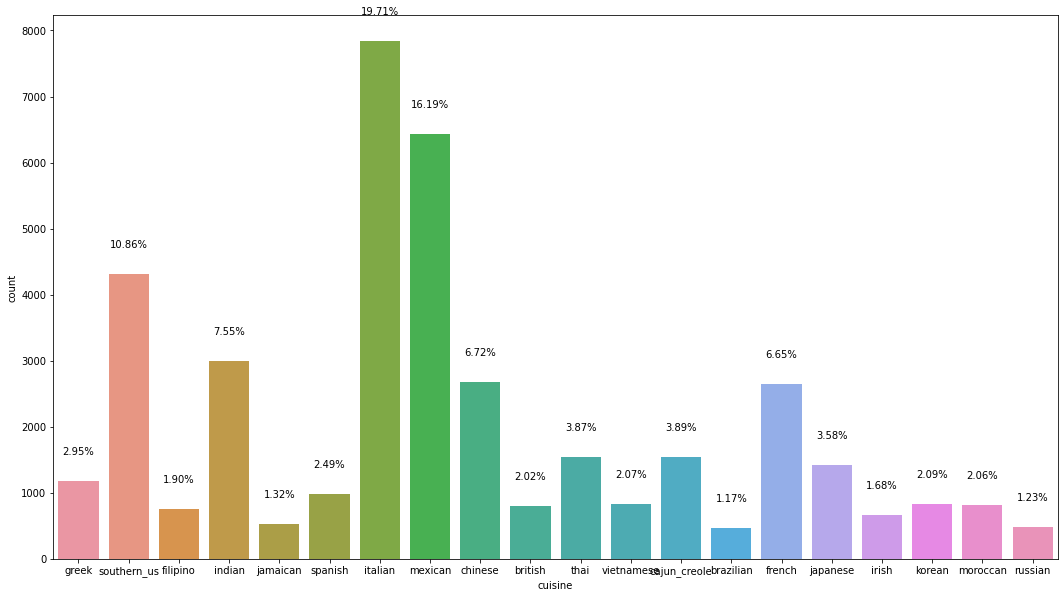

In [12]:
## Custom Function for Bar Plots

def barplot(column,df):
    plt.figure(figsize = (18, 10))
    bar_plot1 = sns.countplot(x=column, data=df)
    
    total = len(df[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 400, percentage, ha="center")

barplot("cuisine",train_data)

# Preprocessing

In [13]:
train_data.ingredients.head(1)

0    [romaine lettuce, black olives, grape tomatoes...
Name: ingredients, dtype: object

In [14]:
train_data.ingredients=train_data.ingredients.apply(' '.join)
test_data.ingredients=test_data.ingredients.apply(' '.join)

In [15]:
train_data.shape

(39774, 3)

### Adding Train and Test data

In [16]:
ingredient = train_data.ingredients

In [17]:
type(ingredient)

pandas.core.series.Series

In [18]:
ingredient.shape

(39774,)

In [19]:
ingredient.head()

0    romaine lettuce black olives grape tomatoes ga...
1    plain flour ground pepper salt tomatoes ground...
2    eggs pepper salt mayonaise cooking oil green c...
3                       water vegetable oil wheat salt
4    black pepper shallots cornflour cayenne pepper...
Name: ingredients, dtype: object

In [20]:
test_data.head()

,id,ingredients
0,18009,baking powder eggs all-purpose flour raisins m...
1,28583,sugar egg yolks corn starch cream of tartar ba...
2,41580,sausage links fennel bulb fronds olive oil cub...
3,29752,meat cuts file powder smoked sausage okra shri...
4,35687,ground black pepper salt sausage casings leeks...


In [21]:
# Concatenating train and test data wrt ingredients column
data_full = pd.concat([test_data.ingredients, ingredient], ignore_index=True)

In [22]:
data_full.shape

(49718,)

In [23]:
data_full.head()

0    baking powder eggs all-purpose flour raisins m...
1    sugar egg yolks corn starch cream of tartar ba...
2    sausage links fennel bulb fronds olive oil cub...
3    meat cuts file powder smoked sausage okra shri...
4    ground black pepper salt sausage casings leeks...
Name: ingredients, dtype: object

In [24]:
# Converting to dataframe
data_full = pd.DataFrame(data_full)

In [25]:
data_full.iloc[9944,:]

ingredients    romaine lettuce black olives grape tomatoes ga...
Name: 9944, dtype: object

In [26]:
data_full.head()

,ingredients
0,baking powder eggs all-purpose flour raisins m...
1,sugar egg yolks corn starch cream of tartar ba...
2,sausage links fennel bulb fronds olive oil cub...
3,meat cuts file powder smoked sausage okra shri...
4,ground black pepper salt sausage casings leeks...


## Apply TF on full data so we can get same columns in Train Validation and Test

In [27]:
# sklearn.feature_extraction.text.CountVectorizer - Convert a collection of text documents to a matrix of token counts
tf_vectorizer_train = CountVectorizer(ngram_range=(1,1))
t_data = tf_vectorizer_train.fit_transform(data_full.ingredients) # tfs are calculated by CountVectorizer's
                                                                              # fit_transform()

In [28]:
t_data.shape

(49718, 3122)

In [29]:
 # Array mapping from feature integer indices to feature name
    
t_data = pd.DataFrame(t_data.toarray(), columns= tf_vectorizer_train.get_feature_names())

In [30]:
t_data.head()

,00,10,100,14,15,25,33,40,43,50,95,96,abalone,abbamele,absinthe,abura,acai,accent,accompaniment,achiote,acid,acini,ackee,acorn,acting,activ,active,added,adobo,adzuki,agar,agave,age,aged,ahi,aioli,ajinomoto,ajwain,aka,alaskan,...,wrappers,wraps,xanthan,xuxu,yaki,yakisoba,yam,yams,yardlong,yeast,yellow,yellowfin,yellowtail,yodel,yoghurt,yogurt,yolk,yolks,yoplait,york,young,yu,yuba,yuca,yucca,yukon,yum,yuzu,yuzukosho,za,zabaglione,zatarain,zatarains,zero,zest,zesty,zinfandel,ziti,zucchini,épices
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
t_data1 = t_data.drop(t_data.index[0:9944])

In [32]:
test_data1 = t_data.drop(t_data.index[9944:])

In [33]:
t_data1.shape

(39774, 3122)

In [34]:
test_data1.shape

(9944, 3122)

In [35]:
train_data.shape

(39774, 3)

### Further preprocessing on Train data

In [36]:
t_data1.reset_index(inplace = True) 

In [37]:
t_data1.drop("index",axis=1,inplace=True)

In [38]:
train_data.head()

,id,cuisine,ingredients
0,10259,greek,romaine lettuce black olives grape tomatoes ga...
1,25693,southern_us,plain flour ground pepper salt tomatoes ground...
2,20130,filipino,eggs pepper salt mayonaise cooking oil green c...
3,22213,indian,water vegetable oil wheat salt
4,13162,indian,black pepper shallots cornflour cayenne pepper...


In [39]:
## Concatenating original train data and TF data of ingredients
train_data1 = pd.concat([train_data, t_data1], axis=1)

In [40]:
train_data1.shape

(39774, 3125)

In [41]:
train_data1.head()

,id,cuisine,ingredients,00,10,100,14,15,25,33,40,43,50,95,96,abalone,abbamele,absinthe,abura,acai,accent,accompaniment,achiote,acid,acini,ackee,acorn,acting,activ,active,added,adobo,adzuki,agar,agave,age,aged,ahi,aioli,ajinomoto,...,wrappers,wraps,xanthan,xuxu,yaki,yakisoba,yam,yams,yardlong,yeast,yellow,yellowfin,yellowtail,yodel,yoghurt,yogurt,yolk,yolks,yoplait,york,young,yu,yuba,yuca,yucca,yukon,yum,yuzu,yuzukosho,za,zabaglione,zatarain,zatarains,zero,zest,zesty,zinfandel,ziti,zucchini,épices
0,10259,greek,romaine lettuce black olives grape tomatoes ga...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,plain flour ground pepper salt tomatoes ground...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,eggs pepper salt mayonaise cooking oil green c...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22213,indian,water vegetable oil wheat salt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13162,indian,black pepper shallots cornflour cayenne pepper...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
train_data1.drop("id",axis=1,inplace=True)   #All unique values
train_data1.drop("ingredients",axis=1,inplace=True)  #already captured in TF dataframe

In [43]:
train_data1.shape

(39774, 3123)

In [44]:
train_data1.head(2)

,cuisine,00,10,100,14,15,25,33,40,43,50,95,96,abalone,abbamele,absinthe,abura,acai,accent,accompaniment,achiote,acid,acini,ackee,acorn,acting,activ,active,added,adobo,adzuki,agar,agave,age,aged,ahi,aioli,ajinomoto,ajwain,aka,...,wrappers,wraps,xanthan,xuxu,yaki,yakisoba,yam,yams,yardlong,yeast,yellow,yellowfin,yellowtail,yodel,yoghurt,yogurt,yolk,yolks,yoplait,york,young,yu,yuba,yuca,yucca,yukon,yum,yuzu,yuzukosho,za,zabaglione,zatarain,zatarains,zero,zest,zesty,zinfandel,ziti,zucchini,épices
0,greek,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,southern_us,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Further preprocessing on Test data

In [45]:
test_data1.shape

(9944, 3122)

In [46]:
test_data1.head()

,00,10,100,14,15,25,33,40,43,50,95,96,abalone,abbamele,absinthe,abura,acai,accent,accompaniment,achiote,acid,acini,ackee,acorn,acting,activ,active,added,adobo,adzuki,agar,agave,age,aged,ahi,aioli,ajinomoto,ajwain,aka,alaskan,...,wrappers,wraps,xanthan,xuxu,yaki,yakisoba,yam,yams,yardlong,yeast,yellow,yellowfin,yellowtail,yodel,yoghurt,yogurt,yolk,yolks,yoplait,york,young,yu,yuba,yuca,yucca,yukon,yum,yuzu,yuzukosho,za,zabaglione,zatarain,zatarains,zero,zest,zesty,zinfandel,ziti,zucchini,épices
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
test_data1.drop("cuisine",axis=1,inplace=True) 

In [48]:
test_data1.shape

(9944, 3121)

# Split the data into train and test

In [49]:
train_data_new = train_data1.sample(frac=0.75 , random_state=200) #random state is a seed value
val_data = train_data1.drop(train_data_new.index)

In [50]:
#Performing train val split on the data
X_train, y_train = train_data_new.loc[:,train_data_new.columns!='cuisine'], train_data_new.loc[:,'cuisine']

X_val, y_val = val_data.loc[:,val_data.columns!='cuisine'], val_data.loc[:,'cuisine']

In [51]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(test_data1.shape)

(29830, 3121)
(9944, 3121)
(29830, 2)
(9944, 2)
(9944, 3121)


In [52]:
y_train.head()

,cuisine,cuisine
8937,southern_us,0
29679,russian,0
15616,spanish,0
3239,french,0
17395,southern_us,0


In [53]:
y_val.columns=['cuisine','b']
y_train.columns=['cuisine','b']

In [54]:
y_val.head()

,cuisine,b
2,filipino,0
3,indian,0
4,indian,0
5,jamaican,0
11,chinese,0


In [55]:
y_train.head()

,cuisine,b
8937,southern_us,0
29679,russian,0
15616,spanish,0
3239,french,0
17395,southern_us,0


In [56]:
y_val.drop("b",axis=1,inplace=True)
y_train.drop("b",axis=1,inplace=True)

In [57]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
y_train = lbl_enc.fit_transform(y_train)
y_val = lbl_enc.fit_transform(y_val)

In [58]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(test_data1.shape)

(29830, 3121)
(29830,)
(9944, 3121)
(9944,)
(9944, 3121)


# Preparation for Model buillding



## Classification report

In [59]:
def get_CR_CM(train_actual,train_predicted,test_actual,test_predicted):
    print('''
         ========================================
           CLASSIFICATION REPORT FOR TRAIN DATA
         ========================================
        ''')
    print(classification_report(train_actual, train_predicted, digits=4))

    print('''
             =============================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
             =============================================
            ''')
    print(classification_report(test_actual, test_predicted, digits=4))
    

## Function to calculate accuracy, recall, precision and F1 score# 

In [60]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    get_CR_CM(train_actual,train_predicted,test_actual,test_predicted)
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average ='weighted')
    train_precision= precision_score(train_actual,train_predicted,average ='weighted')
    train_f1score  = f1_score(train_actual,train_predicted,average ='weighted')
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average ='weighted')
    test_precision= precision_score(test_actual,test_predicted,average ='weighted')
    test_f1score  = f1_score(test_actual,test_predicted,average ='weighted')
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

#  MODEL BUILDING

## Logistic Regression

In [ ]:
log_mod = LogisticRegression(random_state=123)

In [ ]:
log_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train = log_mod.predict(X_train)
y_pred_val = log_mod.predict(X_val)

##### Evaluating the model performance

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"LogisticRegression",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.8958    0.7457    0.8139       346
           1     0.7737    0.6803    0.7240       613
           2     0.8791    0.8075    0.8418      1153
           3     0.8722    0.9107    0.8911      2039
           4     0.8529    0.7754    0.8123       561
           5     0.7291    0.7522    0.7405      1961
           6     0.8920    0.8069    0.8473       870
           7     0.9076    0.9444    0.9257      2268
           8     0.8342    0.6694    0.7428       481
           9     0.8648    0.9316    0.8970      5873
          10     0.9384    0.8226    0.8767       389
          11     0.8946    0.8070    0.8485      1083
          12     0.9128    0.8826    0.8975       605
          13     0.9350    0.9510    0.9430      4859
          14     0.9299    0.8705    0.8992       610
          15     0.8425    0.6910    0.7593       356
          16     0.8132

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.868186,0.868186,0.868404,0.866828,0.773431,0.773431,0.770115,0.769406


In [ ]:
y_test = log_mod.predict(test_data1)
test_cuisine = lbl_enc.inverse_transform(y_test)
d = pd.DataFrame(test_cuisine)
d.to_csv("submit_log1.csv")

# Ridge Regularization

In [ ]:
#### TYPE
ridge_model = RidgeClassifierCV(fit_intercept=True, alphas=[0.0125, 0.025, 0.05,.1, .125, .25, .5, 1., 2., 4.,10,100])

In [ ]:
ridge_model.fit(X_train, y_train)

RidgeClassifierCV(alphas=array([1.25e-02, 2.50e-02, 5.00e-02, 1.00e-01, 1.25e-01, 2.50e-01,
       5.00e-01, 1.00e+00, 2.00e+00, 4.00e+00, 1.00e+01, 1.00e+02]))

In [ ]:
y_pred_train = ridge_model.predict(X_train)
y_pred_val = ridge_model.predict(X_val)

##### Evaluating the model performance

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"Ridge",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.8424    0.4017    0.5440       346
           1     0.7801    0.3589    0.4916       613
           2     0.8335    0.6990    0.7604      1153
           3     0.7436    0.9004    0.8146      2039
           4     0.9007    0.4367    0.5882       561
           5     0.6783    0.6517    0.6648      1961
           6     0.8255    0.6632    0.7355       870
           7     0.8509    0.9109    0.8799      2268
           8     0.8190    0.3763    0.5157       481
           9     0.7647    0.9360    0.8417      5873
          10     0.8601    0.6324    0.7289       389
          11     0.9079    0.6916    0.7851      1083
          12     0.8993    0.6496    0.7543       605
          13     0.8697    0.9366    0.9019      4859
          14     0.8819    0.6852    0.7712       610
          15     0.7958    0.4270    0.5558       356
          16     0.6955

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.868186,0.868186,0.868404,0.866828,0.773431,0.773431,0.770115,0.769406
1,Ridge,0.789373,0.789373,0.796697,0.778814,0.743765,0.743765,0.747950,0.727447


In [ ]:
y_test = ridge_model.predict(test_data1)
test_cuisine = lbl_enc.inverse_transform(y_test)
d = pd.DataFrame(test_cuisine)
d.to_csv("submit_ridge.csv")

# NAIVE BAYES

In [ ]:
naive = GaussianNB()

In [ ]:
naive.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_train = naive.predict(X_train)
y_pred_val = naive.predict(X_val)

##### Evaluating the model performance

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"Naive Bayes",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.1196    0.8497    0.2096       346
           1     0.2949    0.3883    0.3352       613
           2     0.3772    0.5620    0.4514      1153
           3     0.7953    0.1810    0.2948      2039
           4     0.2281    0.5294    0.3188       561
           5     0.5011    0.2254    0.3109      1961
           6     0.1962    0.3184    0.2428       870
           7     0.8618    0.3629    0.5107      2268
           8     0.2356    0.5114    0.3226       481
           9     0.9866    0.1755    0.2981      5873
          10     0.0997    0.9692    0.1808       389
          11     0.7794    0.3361    0.4697      1083
          12     0.2025    0.9917    0.3363       605
          13     0.9753    0.3254    0.4880      4859
          14     0.2188    0.8180    0.3452       610
          15     0.1214    0.8315    0.2118       356
          16     0.7991

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.868186,0.868186,0.868404,0.866828,0.773431,0.773431,0.770115,0.769406
1,Ridge,0.789373,0.789373,0.796697,0.778814,0.743765,0.743765,0.747950,0.727447
2,Naive Bayes,0.329568,0.329568,0.696056,0.355241,0.257241,0.257241,0.531367,0.281730


# KNN

In [ ]:
knn = KNeighborsClassifier(algorithm = 'brute',n_neighbors = 7,metric="euclidean")

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=7)

In [ ]:
y_pred_train = knn.predict(X_train)
y_pred_val = knn.predict(X_val)

##### Evaluating the model performance

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"KNN",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.5358    0.6272    0.5779       346
           1     0.4991    0.4519    0.4743       613
           2     0.7575    0.6557    0.7029      1153
           3     0.7576    0.8230    0.7889      2039
           4     0.5698    0.6916    0.6248       561
           5     0.5387    0.6211    0.5770      1961
           6     0.6995    0.5966    0.6439       870
           7     0.7548    0.8144    0.7835      2268
           8     0.6577    0.4595    0.5410       481
           9     0.7078    0.8842    0.7862      5873
          10     0.8148    0.5090    0.6266       389
          11     0.6841    0.6417    0.6622      1083
          12     0.7704    0.6711    0.7173       605
          13     0.8339    0.8638    0.8486      4859
          14     0.7577    0.4869    0.5928       610
          15     0.8217    0.2978    0.4371       356
          16     0.7522

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.868186,0.868186,0.868404,0.866828,0.773431,0.773431,0.770115,0.769406
1,Ridge,0.789373,0.789373,0.796697,0.778814,0.743765,0.743765,0.747950,0.727447
2,Naive Bayes,0.329568,0.329568,0.696056,0.355241,0.257241,0.257241,0.531367,0.281730
3,KNN,0.726685,0.726685,0.731895,0.720043,0.635861,0.635861,0.635146,0.625462


### Instantiate GidSearchCV

In [ ]:
parameters = {'n_neighbors':[9,11,15]}

gs_clf = GridSearchCV(KNeighborsClassifier(metric="euclidean", n_jobs=-1),
                   parameters, verbose= True, cv=3)

In [ ]:
gs_clf.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 64.7min finished


GridSearchCV(cv=3,
             estimator=KNeighborsClassifier(metric='euclidean', n_jobs=-1),
             param_grid={'n_neighbors': [9, 11, 15]}, verbose=True)

In [ ]:
knn_model = gs_clf.best_estimator_
knn_model

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=11)

In [ ]:
print (gs_clf.best_score_, gs_clf.best_params_) 

0.622896163805453 {'n_neighbors': 11}


In [ ]:
y_pred_train = gs_clf.predict(X_train)
y_pred_val = gs_clf.predict(X_val)

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"KNN_best",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.5497    0.5434    0.5465       346
           1     0.4665    0.3524    0.4015       613
           2     0.7719    0.5958    0.6725      1153
           3     0.7526    0.7935    0.7725      2039
           4     0.5317    0.6435    0.5823       561
           5     0.5192    0.5793    0.5476      1961
           6     0.7191    0.5414    0.6177       870
           7     0.7317    0.7901    0.7598      2268
           8     0.6337    0.3992    0.4898       481
           9     0.6758    0.8881    0.7676      5873
          10     0.8128    0.4576    0.5855       389
          11     0.6520    0.6159    0.6334      1083
          12     0.7769    0.6331    0.6976       605
          13     0.8134    0.8586    0.8354      4859
          14     0.7395    0.4607    0.5677       610
          15     0.8182    0.2528    0.3863       356
          16     0.6946

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.868186,0.868186,0.868404,0.866828,0.773431,0.773431,0.770115,0.769406
1,Ridge,0.789373,0.789373,0.796697,0.778814,0.743765,0.743765,0.747950,0.727447
2,Naive Bayes,0.329568,0.329568,0.696056,0.355241,0.257241,0.257241,0.531367,0.281730
3,KNN,0.726685,0.726685,0.731895,0.720043,0.635861,0.635861,0.635146,0.625462
4,KNN_best,0.703788,0.703788,0.709236,0.694139,0.635056,0.635056,0.636364,0.621851


In [ ]:
## Predicting on test
y_test = gs_clf.predict(test_data1)
test_cuisine = lbl_enc.inverse_transform(y_test)
d = pd.DataFrame(test_cuisine)
d.to_csv("submit_knn.csv")

# SVC with OVR mode

In [63]:
from sklearn.decomposition import PCA
pca = PCA()
X_train1 = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([6.98055813e-02, 4.00359056e-02, 3.50639926e-02, ...,
       8.93956848e-36, 8.33579253e-36, 9.16912737e-37])

In [64]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 301


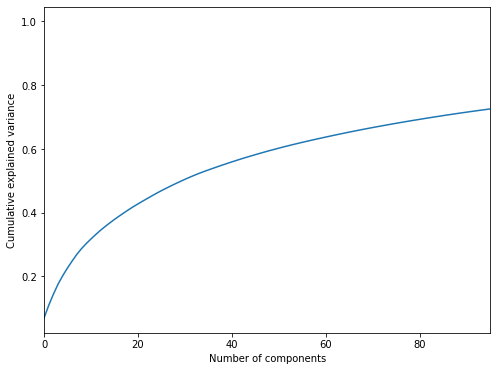

In [65]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,95,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [68]:
X_train_pca=X_train1[: ,0:301]
X_val_pca=pca.transform(X_val)[:,0:301]
print(X_train_pca.shape)
print(X_val_pca.shape)

(29830, 301)
(9944, 301)


In [69]:
from sklearn.multiclass import OneVsRestClassifier

In [70]:
clf = SVC(C=100, kernel='rbf', degree=3,
          gamma=1, coef0=1, shrinking=True, 
          probability=False, tol=0.001, cache_size=200,
          class_weight=None, verbose=True, max_iter=-1,
          decision_function_shape='ovr', random_state=None)
model = OneVsRestClassifier(clf, n_jobs=-1)


In [71]:
model.fit(X_train_pca,y_train)

OneVsRestClassifier(estimator=SVC(C=100, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=1,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=1, kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=True),
                    n_jobs=-1)

#### Predict

In [73]:
y_pred_train = model.predict(X_train_pca)
y_pred_val = model.predict(X_val_pca)

In [74]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"SVC_OVR_pca",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       346
           1     1.0000    1.0000    1.0000       613
           2     1.0000    1.0000    1.0000      1153
           3     0.9995    1.0000    0.9998      2039
           4     1.0000    1.0000    1.0000       561
           5     0.9990    0.9995    0.9992      1961
           6     1.0000    0.9989    0.9994       870
           7     0.9996    0.9996    0.9996      2268
           8     0.9979    0.9979    0.9979       481
           9     0.9995    1.0000    0.9997      5873
          10     1.0000    1.0000    1.0000       389
          11     1.0000    0.9991    0.9995      1083
          12     1.0000    1.0000    1.0000       605
          13     0.9998    0.9998    0.9998      4859
          14     0.9984    1.0000    0.9992       610
          15     1.0000    1.0000    1.0000       356
          16     0.9997

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,SVC_OVR_pca,0.999631,0.999631,0.999631,0.999631,0.258347,0.258347,0.663711,0.18158


In [75]:
# save the model to disk
import pickle
filename = 'svm_ovr.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
## Predicting on test
test_data_pca=pca.transform(test_data1)[:,0:301]
y_test = model.predict(test_data_pca)
test_cuisine = lbl_enc.inverse_transform(y_test)
d = pd.DataFrame(test_cuisine)
d.to_csv("/content/drive/MyDrive/Whats_Cooking/submit_svm.csv")